<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/3_Adicionando_novas_classes_ou_novos_dados_notes_withnorun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exemplo adicionando uma nova classe (com dados) e/ ou novos dados com classes existentes

Agenda:
- Carregar base
- Montar modelo
- Treinar modelo (modo simples para construção apenas)
- Avaliar

In [ ]:
!pip install livelossplot

In [ ]:
#keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

#utilitários
import pandas as pd
import numpy as np
import random
import seaborn as sns

#sklearn
import sklearn as sk
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score
from livelossplot import PlotLossesKeras



In [ ]:
#1) carregando dataset
from sklearn.datasets import load_iris
data = load_iris()
y = data['target']
x = data['data']

In [ ]:
#remover uma classe
y_2 = y[0:100]
x_2 = x[0:100,:]

In [ ]:
#para converter no formato one hot
y_2 = to_categorical(y_2, num_classes=2)

In [ ]:
#criando modelo da rede
def construirModelo(input_shape):
  model = keras.Sequential(
      [layers.Input(shape= input_shape),
       layers.Dense(32, activation='relu'),
       layers.Dense(32, activation='relu'),
       layers.Dense(2, activation='softmax')
      ]
  )

  #especificar: otimizador e função de custo
  model.compile("adam", "categorical_crossentropy",
                metrics=[
                    keras.metrics.Accuracy(name='accuracy')],
                )
  return model


Epoch 1/10
8/8 [==============================] - 1s 37ms/step - loss: 1.0238 - accuracy: 0.0000e+00 - val_loss: 0.4819 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 0.5706 - accuracy: 0.0000e+00 - val_loss: 0.3456 - val_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.3396 - accuracy: 0.0000e+00 - val_loss: 0.3199 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.2764 - accuracy: 0.0000e+00 - val_loss: 0.3269 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.2467 - accuracy: 0.0000e+00 - val_loss: 0.3038 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.2162 - accuracy: 0.0000e+00 - val_loss: 0.2623 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1870 - accuracy: 0.0000e+00 - val_loss: 0.2226

<Axes: >

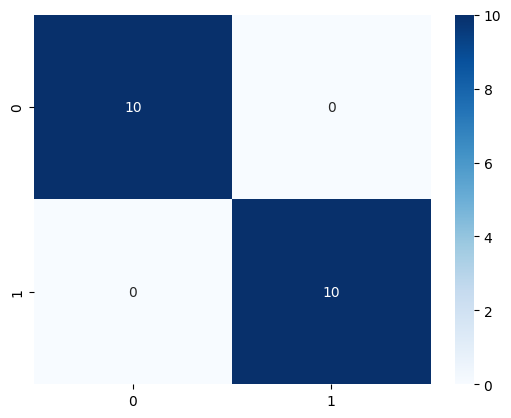

In [ ]:
#rodando um fit com o modelo
#TODO: lembrar que depois o exemplo deve ser expandido para realizar o experimento corretamente
batch_size = 8
epochs = 10

model = construirModelo(x_2.shape[1])
#plot_model(model, show_shapes=True)

x_train, x_test, y_train, y_test = train_test_split(x_2, y_2,
                                                      train_size=0.8,
                                                      random_state = random.randint(1, 1000))
H = model.fit(
      x_train,
      y_train,
      batch_size= batch_size,
      epochs = epochs,
      #callbacks=[PlotLossesKeras()], #plotando gráficos
      validation_split = 0.2)

y_pred = model.predict(x_test)
matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(matrix, cmap='Blues', annot=True)


##Adicionando uma nova classe ao modelo
 - Por tabela, também está adicionando novos dados

 - Essa adição poderia ser coordenada
   - Escolher adicionar apenas novos indivíduos
   - ou passar para o modelo os novos dados misturados com os antigos

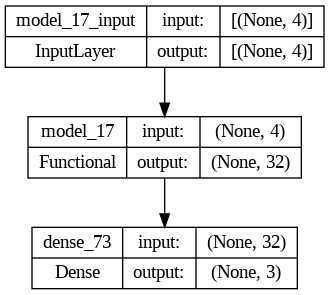

In [ ]:
#retirando a última camada por ser um classificador apenas de duas classes
def construirModeloNovo(input_shape, modelo_anterior):
  #modelo base sem a última camada, classificador (ativação + dense)
  base = keras.Model(modelo_anterior.input, model.layers[-2].output)

  #criando um novo modelo
  modelo_novo = keras.Sequential([
      base, #pre treinado
      layers.Dense(3, activation='softmax')]) #adicionando nova camada para classificação em 3 classes

  #se quiser congelar a rede anterior
  #for layer in base.layers:
  #  layer.trainable = False

  #especificar: otimizador e função de custo
  modelo_novo.compile("adam", "categorical_crossentropy",
                metrics=[
                    keras.metrics.Accuracy(name='accuracy')],
                )

  return modelo_novo

model_novo = construirModeloNovo(x.shape[1], model)
plot_model(model_novo, show_shapes=True)

Epoch 1/30
12/12 [==============================] - 1s 22ms/step - loss: 1.4028 - accuracy: 0.0000e+00 - val_loss: 1.2277 - val_accuracy: 0.0000e+00
Epoch 2/30
12/12 [==============================] - 0s 7ms/step - loss: 1.2690 - accuracy: 0.0000e+00 - val_loss: 1.1404 - val_accuracy: 0.0000e+00
Epoch 3/30
12/12 [==============================] - 0s 6ms/step - loss: 1.1528 - accuracy: 0.0000e+00 - val_loss: 1.0793 - val_accuracy: 0.0000e+00
Epoch 4/30
12/12 [==============================] - 0s 7ms/step - loss: 1.0734 - accuracy: 0.0000e+00 - val_loss: 1.0332 - val_accuracy: 0.0000e+00
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 1.0082 - accuracy: 0.0000e+00 - val_loss: 0.9978 - val_accuracy: 0.0000e+00
Epoch 6/30
12/12 [==============================] - 0s 7ms/step - loss: 0.9623 - accuracy: 0.0000e+00 - val_loss: 0.9691 - val_accuracy: 0.0000e+00
Epoch 7/30
12/12 [==============================] - 0s 6ms/step - loss: 0.9243 - accuracy: 0.0000e+00 - val_los

<Axes: >

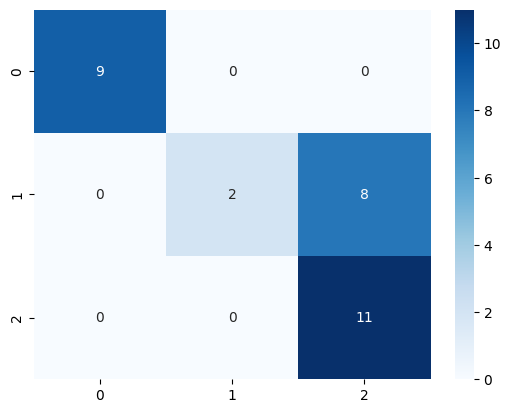

In [ ]:
batch_size = 8
epochs = 30
y_3 = to_categorical(y, num_classes=3)
model_novo = construirModeloNovo(x.shape[1], model)

#TODO: poderia passar inicialmente só a nova classe
x_train, x_test, y_train, y_test = train_test_split(x, y_3,
                                                      train_size=0.8,
                                                      random_state = random.randint(1, 1000))
H = model_novo.fit(
      x_train,
      y_train,
      batch_size= batch_size,
      epochs = epochs,
      #callbacks=[PlotLossesKeras()], #plotando gráficos
      validation_split = 0.2)

y_pred = model_novo.predict(x_test)
matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
sns.heatmap(matrix, cmap='Blues', annot=True)

